In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [3]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 12개의 베리 데이터로 구성되어 있음 

In [46]:
# 사과정보 불러오기 
apple=fruits.iloc[:35,]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [47]:
# apple에 대한 산포도 그리기
import matplotlib.pyplot as plt


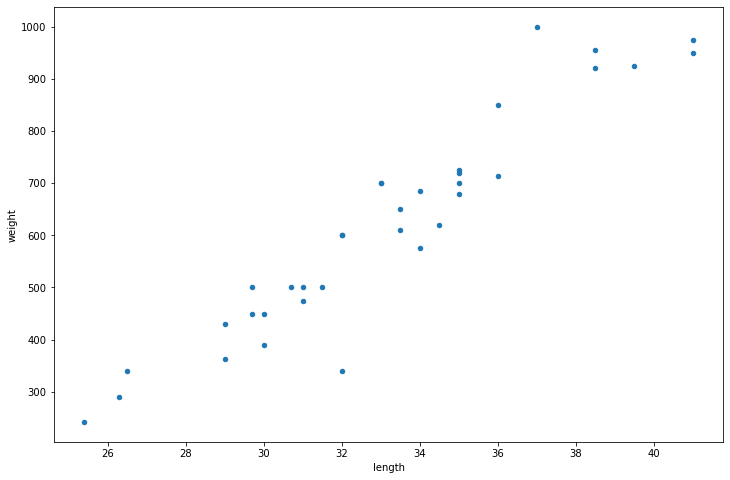

In [48]:
apple.plot(
    figsize = (12,8),
    kind="scatter",
    x="length",
    y="weight",
    s= 20)
plt.show()

In [49]:
# 딸기에 대한 산포도 그리기 
berry=fruits[36:]
berry

,length,weight,name
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry
40,11.3,8.7,berry
41,11.8,10.0,berry
42,11.8,9.9,berry
43,12.0,9.8,berry
44,12.2,12.2,berry
45,12.4,13.4,berry


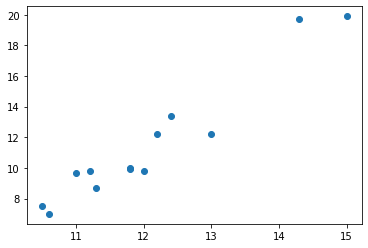

In [50]:
plt.scatter(
    berry['length'],
    berry['weight'],
)
plt.show()

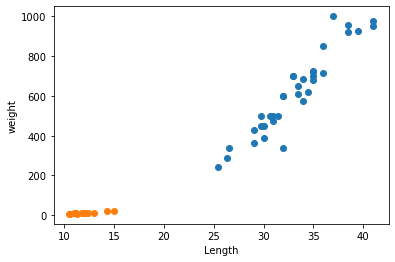

In [52]:
# 2개의 DataSet을 산포도로 한꺼번에 그리기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel("Length")
plt.ylabel("weight")
plt.show()

---
# 머신러닝 위한 데이터 준비
### feature data 와 Target data 분리

In [53]:
# feature data
fruitsData = fruits[['length','weight']]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [55]:
# target Data
fruitsTarget = fruits[['name']]
fruitsTarget.head()

,name
0,apple
1,apple
2,apple
3,apple
4,apple


---
# 최근접이웃(KNN: K Nearst Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다. 

![](../Data/knn01.png)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
kn = KNeighborsClassifier() 
# n_neighbors = 5 / 보통은 홀수로 입력 <= hyper parameter

In [60]:
# 학습시키기 
kn.fit(fruitsData,fruitsTarget)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
# 정확성 확인하기 
kn.score(fruitsData,fruitsTarget)

1.0

> 문제와 답을 다 알려주고 정확성을 확인하니 바로 100점이 나왔다.

### 예측해보기
길이가 30cm 이고 무게가 600g인 과일은 무엇일까요?

In [63]:
kn.predict([[30,600]])

array(['apple'], dtype=object)

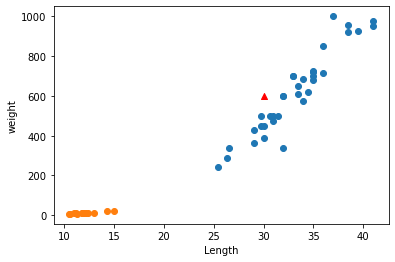

In [66]:
# 산포도로 예측 확인 
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)
# 예측 
plt.scatter(30,600, marker='^',c='red')

plt.xlabel("Length")
plt.ylabel("weight")
plt.show()